In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_color_codes = True

## jointplot()

THis is used to draw the scatter plot and marginal histograms

kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }, optional


In [25]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


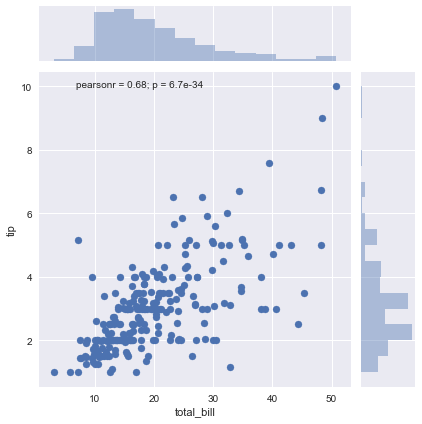

In [7]:
g = sns.jointplot(x="total_bill", y="tip", data=tips)

/Users/Mehul/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


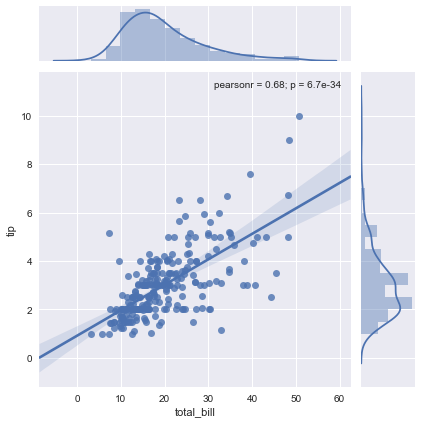

In [9]:
# Add Kernel density and regression
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg")


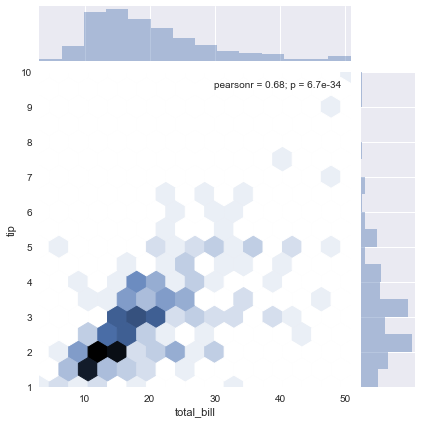

In [10]:
# Hexagonal bins
g = sns.jointplot("total_bill", "tip", data=tips, kind="hex")

/Users/Mehul/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


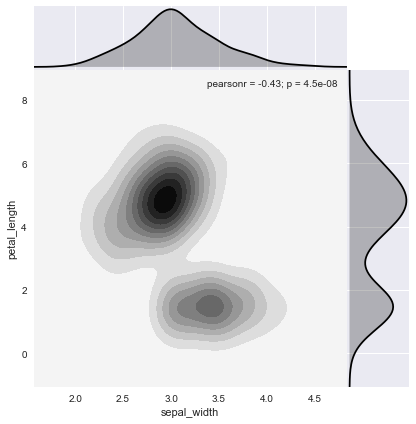

In [13]:
iris = sns.load_dataset("iris")
g = sns.jointplot("sepal_width", "petal_length", data=iris,
                  kind="kde", space=0, color="k")


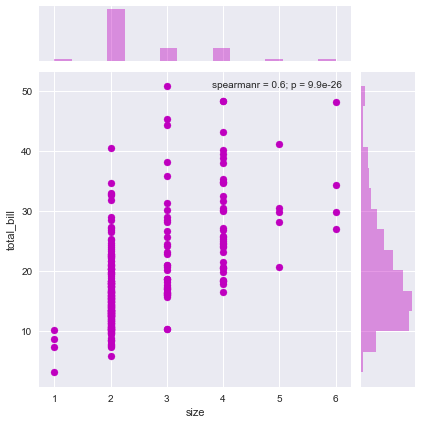

In [18]:
import scipy as spy
from scipy.stats import spearmanr
g = sns.jointplot("size", "total_bill", data=tips,
                  stat_func=spearmanr, color="m")

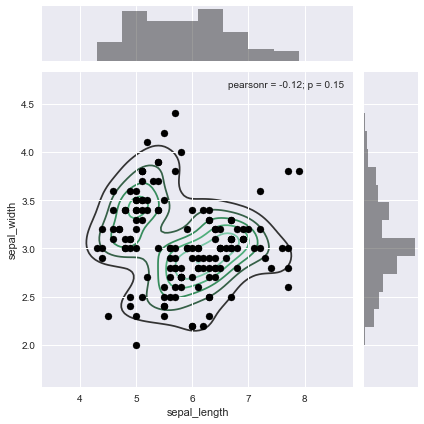

In [19]:
g = (sns.jointplot("sepal_length", "sepal_width",
                 data=iris, color="k")
        .plot_joint(sns.kdeplot, zorder=0, n_levels=6))


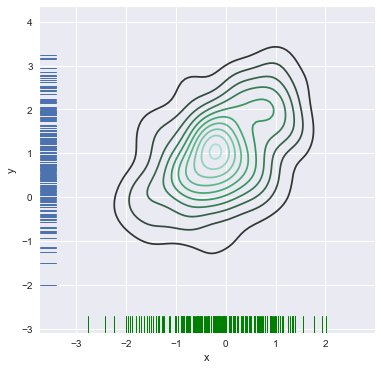

In [21]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

f , ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

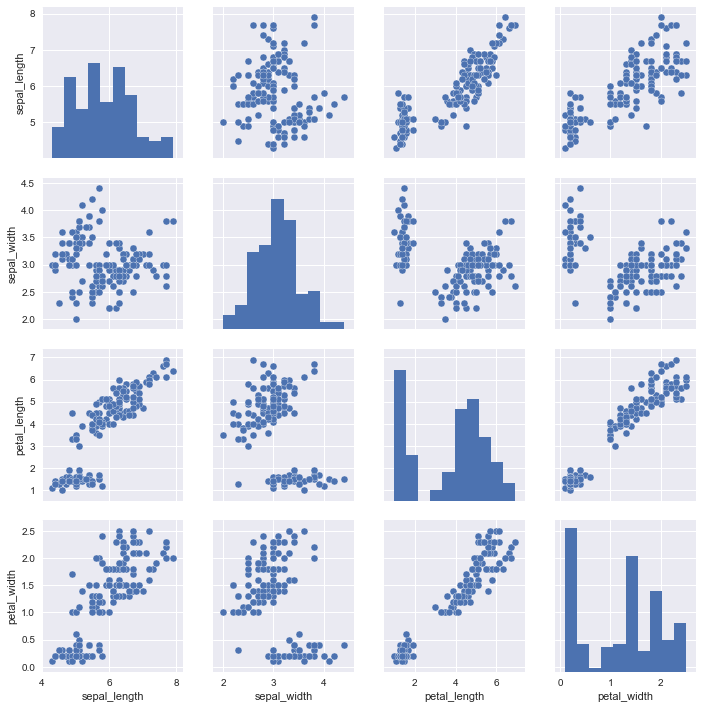

In [22]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

The jointplot() function uses a JointGrid to manage the figure. For more flexibility, you may want to draw your figure by using JointGrid directly. jointplot() returns the JointGrid object after plotting, which you can use to add more layers or to tweak other aspects of the visualization:

/Users/Mehul/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


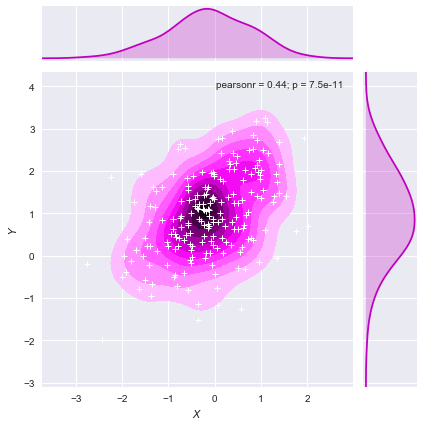

In [23]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

Much like the relationship between jointplot() and JointGrid, the pairplot() function is built on top of a PairGrid object, which can be used directly for more flexibility

/Users/Mehul/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/Users/Mehul/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


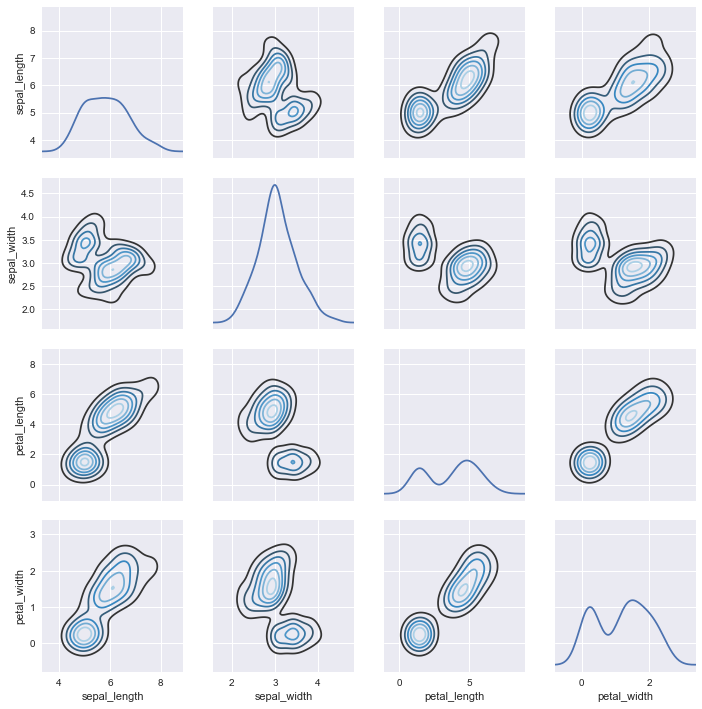

In [24]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);